In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

## Cleaning Dataset

In [5]:
df = pd.read_csv("C:/Users/Igor/Desktop/movies.csv")

In [6]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


In [14]:
# Missing Data
for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing))

budget - 0.2831246739697444%
company - 0.002217005738132499%
country - 0.0003912363067292645%
director - 0.0%
genre - 0.0%
gross - 0.02464788732394366%
name - 0.0%
rating - 0.010041731872717789%
released - 0.0002608242044861763%
runtime - 0.0005216484089723526%
score - 0.0003912363067292645%
star - 0.00013041210224308815%
votes - 0.0003912363067292645%
writer - 0.0003912363067292645%
year - 0.0%


In [15]:
# Data Types
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
writer       object
year          int64
dtype: object

In [20]:
# Filling NaN/NA values with 0 to be able to convert their Data Type (float64) to int64
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)
df['runtime'] = df['runtime'].fillna(0)
df['votes'] = df['votes'].fillna(0) 

In [21]:
# Change Data Types
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [61]:
# Create new column with the correct movie released year
df['oficialreleased'] = df['year'].astype(str).str[:4]

In [62]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,oficialreleased
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146,8.4,Jack Nicholson,927000,Stephen King,1980,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104,5.8,Brooke Shields,65000,Henry De Vere Stacpoole,1980,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124,8.7,Mark Hamill,1200000,Leigh Brackett,1980,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88,7.7,Robert Hays,221000,Jim Abrahams,1980,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98,7.3,Chevy Chase,108000,Brian Doyle-Murray,1980,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,7000,NaN,United States,Joseph Ebanks,Drama,0,More to Life,NaN,"October 23, 2020 (United States)",90,3.1,Shannon Bond,18,Joseph Ebanks,2020,2020
7664,0,Cactus Blue Entertainment,United States,Dusty Dukatz,Comedy,0,Dream Round,NaN,"February 7, 2020 (United States)",90,4.7,Michael Saquella,36,Lisa Huston,2020,2020
7665,58750,Embi Productions,United States,Nkanya Nkwai,Drama,0,Saving Mbango,NaN,"April 27, 2020 (Cameroon)",0,5.7,Onyama Laura,29,Lynno Lovert,2020,2020
7666,15000,NaN,United States,James Randall,Drama,0,It's Just Us,NaN,"October 1, 2020 (United States)",120,NaN,Christina Roz,0,James Randall,2020,2020


In [65]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,oficialreleased
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009 (United States)",162,7.8,Sam Worthington,1100000,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181,8.4,Robert Downey Jr.,903000,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997 (United States)",194,7.8,Leonardo DiCaprio,1100000,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138,7.8,Daisy Ridley,876000,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149,8.4,Robert Downey Jr.,897000,Christopher Markus,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,0,Gibraltar Entertainment,United States,Andrew Lane,Crime,0,Mortal Passions,R,"January 26, 1990 (United States)",92,4.5,Zach Galligan,274,Alan Moskowitz,1989,1989
1614,0,Allied Vision,United Kingdom,Gérard Kikoïne,Horror,0,Edge of Sanity,R,"April 14, 1989 (United States)",85,5.2,Anthony Perkins,1300,J.P. Félix,1989,1989
1606,0,Trans World Entertainment (TWE),Canada,Tibor Takács,Fantasy,0,"I, Madman",R,"April 7, 1989 (United States)",89,6.0,Jenny Wright,2900,David Chaskin,1989,1989
1601,0,Budapest Stúdió Vállalat,Hungary,Ildikó Enyedi,Comedy,0,My Twentieth Century,NaN,"January 13, 1990 (Japan)",104,7.1,Dorota Segda,1500,Ildikó Enyedi,1989,1989


In [69]:
# Check if are any duplicates values
df.drop_duplicates()

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

## Correlations in the Data

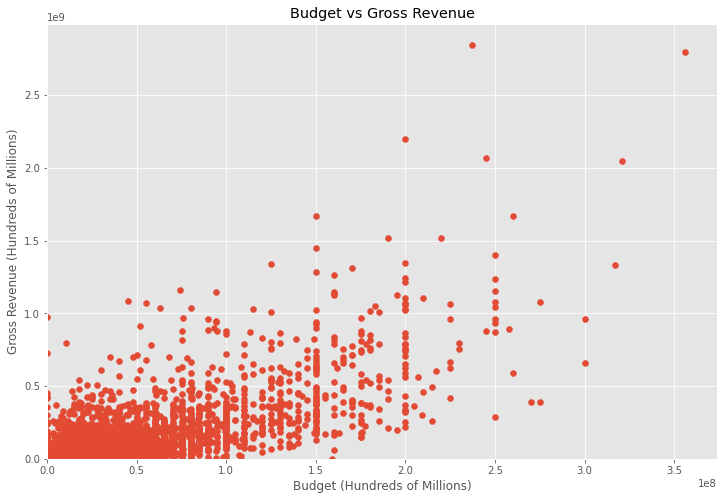

In [105]:
# Scatter plot Budget vs Gross Revenue
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget (Hundreds of Millions)')  
plt.ylabel('Gross Revenue (Hundreds of Millions)')
plt.xlim(0)
plt.ylim(0)

plt.show()

(0.0, 2990043669.1887875)

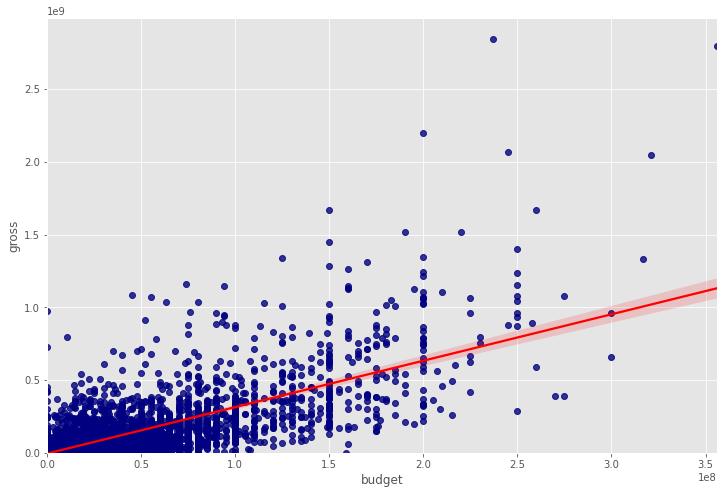

In [107]:
# Improving visualization of the graph using Seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "navy"}, line_kws={"color": "red"})
plt.ylim(0)

Text(87.0, 0.5, 'Movie Features')

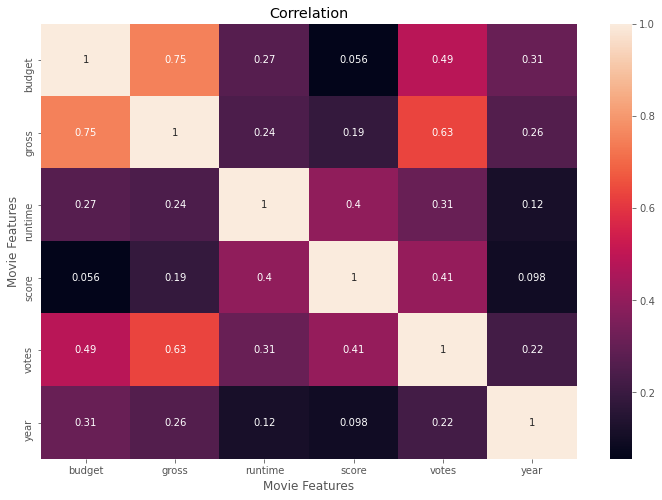

In [102]:
# Correlation Matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation')
plt.xlabel('Movie Features')  
plt.ylabel('Movie Features')  

In [99]:
df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.750157,0.268372,0.055665,0.486931,0.309212
gross,0.750157,1.000000,0.244339,0.186392,0.632870,0.261900
runtime,0.268372,0.244339,1.000000,0.398387,0.306984,0.116358
score,0.055665,0.186392,0.398387,1.000000,0.409182,0.097995
votes,0.486931,0.632870,0.306984,0.409182,1.000000,0.222427
year,0.309212,0.261900,0.116358,0.097995,0.222427,1.000000


In [113]:
# The company, country, director, genre, name, star, and writer in this dataset are in string, so to able to visualize I will convert into numeric.
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
df

KeyError: 'company'

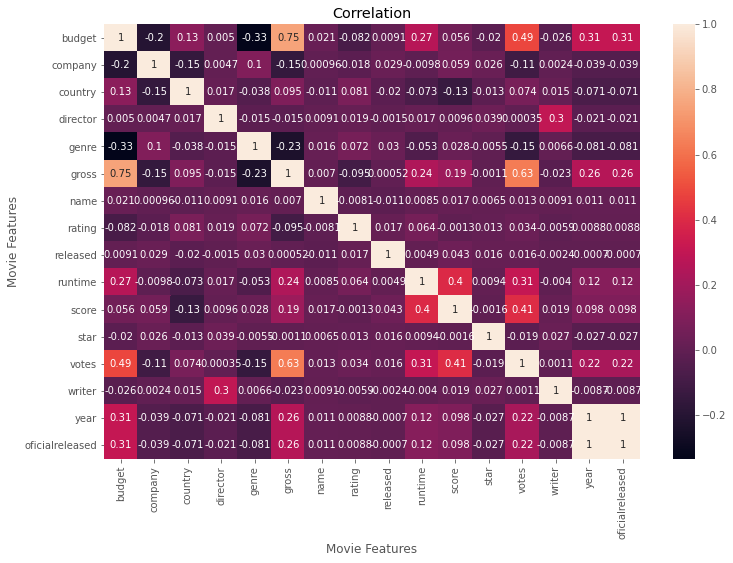

In [116]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation')
plt.xlabel('Movie Features')  
plt.ylabel('Movie Features') 
plt.show()

In [118]:
corr_matx = df.corr()
corr_pairs = corr_matx.unstack()
corr_pairs

budget           budget             1.000000
                 company           -0.201700
                 country            0.131720
                 director           0.004976
                 genre             -0.334021
                 gross              0.750157
                 name               0.020548
                 rating            -0.081939
                 released           0.009145
                 runtime            0.268372
                 score              0.055665
                 star              -0.019952
                 votes              0.486931
                 writer            -0.025911
                 year               0.309212
                 oficialreleased    0.309212
company          budget            -0.201700
                 company            1.000000
                 country           -0.150228
                 director           0.004740
                 genre              0.099779
                 gross             -0.149630
          

In [119]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget           genre             -0.334021
genre            budget            -0.334021
                 gross             -0.234297
gross            genre             -0.234297
budget           company           -0.201700
company          budget            -0.201700
country          company           -0.150228
company          country           -0.150228
gross            company           -0.149630
company          gross             -0.149630
genre            votes             -0.145296
votes            genre             -0.145296
country          score             -0.133348
score            country           -0.133348
company          votes             -0.109944
votes            company           -0.109944
rating           gross             -0.095450
gross            rating            -0.095450
rating           budget            -0.081939
budget           rating            -0.081939
genre            year              -0.081261
year             genre             -0.081261
oficialrel

In [121]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross            votes              0.632870
votes            gross              0.632870
budget           gross              0.750157
gross            budget             0.750157
budget           budget             1.000000
rating           rating             1.000000
company          company            1.000000
country          country            1.000000
director         director           1.000000
genre            genre              1.000000
gross            gross              1.000000
name             name               1.000000
year             year               1.000000
oficialreleased  oficialreleased    1.000000
released         released           1.000000
runtime          runtime            1.000000
score            score              1.000000
star             star               1.000000
votes            votes              1.000000
writer           writer             1.000000
oficialreleased  year               1.000000
year             oficialreleased    1.000000
dtype: flo

## Final Observations

* Votes and Budget have the highest correlation to gross revenue
* Company has low correlation